В результате исследования количества компонент в графе hnsw построенному с помощью библиотеки hnswlib. Каждый из графов имел лишь одну компоненту связности. Проверка была на [yandex-deep1B](https://research.yandex.com/blog/benchmarks-for-billion-scale-similarity-search#14h2). С разными входными параметрами m и ef.

Код с тестом в файле components_test.py

In [1]:
import pandas as pd

components_test = pd.read_csv('components-test-results.csv', sep=',')

components_test

,m,ef,num elements,dimension,connected components
0,64,64,10000000,96,1
1,32,64,10000000,96,1
2,16,64,10000000,96,1


Также были попытки улучшить эвристику, но не получилось выбить улучшение и не ухудшение по метрикам одновременно. Лучший достигнутый результат представлен на графике. Эксперименты проводились на датасете siftsmall. Улучшений на нем не было получено. Также проведен был эксперимент на sift, но из-за временных ограничений экспеример был проведен всего 1 и тот не увенчался успехом

In [4]:
test_hnsw = pd.read_csv('test_hnsw_results.csv', sep=',')

test_hnsw.head()

,method,m,m0,ef,recall,avg calc
0,heuristic,32,64,64,1.000,906.21
1,heuristic,16,32,64,1.000,648.19
2,heuristic,8,16,64,0.998,459.01
3,optimized,32,64,64,0.998,1097.17
4,optimized,16,32,64,0.994,697.43


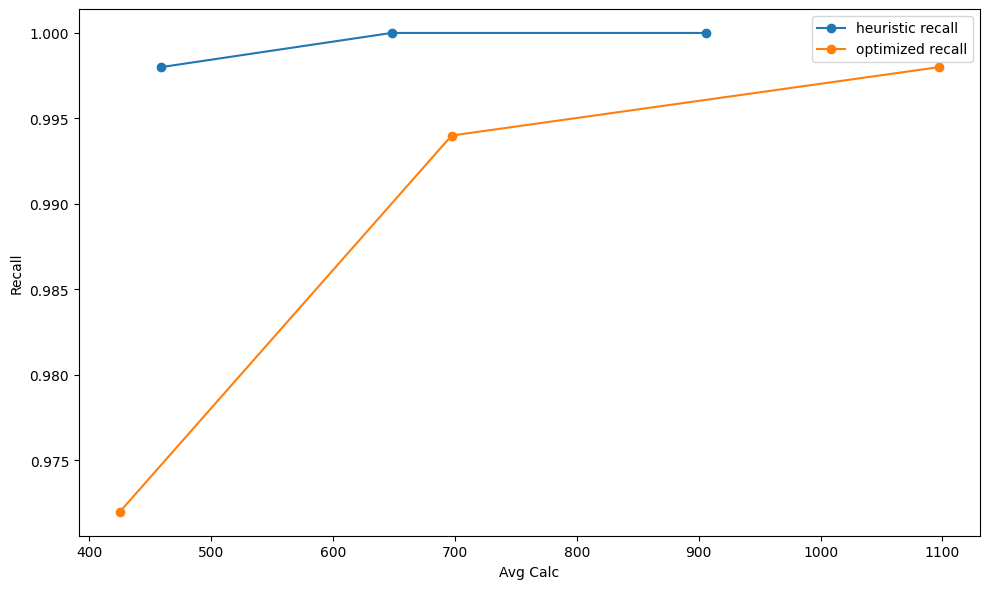

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = test_hnsw.groupby('method')

plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.plot(group['avg calc'], group['recall'], marker='o', label=f'{name} recall')
    
plt.xlabel('Avg Calc')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.savefig("result.png")
plt.show()